Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


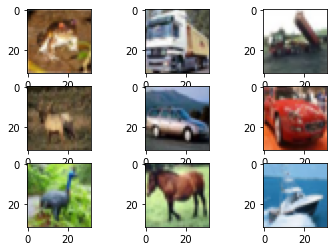

In [ ]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10


(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

print('Train: X=%s, y=%s' % (xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (xtest.shape, ytest.shape))


for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255.0
xtest /= 255.0

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento para tener uno de validación
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, train_size = 0.83)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(6,(5,5), strides=1, activation='relu', input_shape=(32,32,3), padding='valid')) #C1
model.add(AveragePooling2D(pool_size=(2,2))) #S2
model.add(Conv2D(16,(5,5), strides=1, activation='sigmoid', padding='valid')) #C3
model.add(AveragePooling2D(pool_size=(2,2))) #S4
model.add(Conv2D(120,(5,5), strides=1, activation='sigmoid', padding='valid')) #C5
model.add(tf.keras.layers.Flatten())
model.add(Dense(units = 84, activation = 'relu')) #F6
model.add(Dense(units = 10, activation = 'softmax')) #OUTPUT

model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 5 , batch_size = 32, verbose = 1)

Epoch 1/5
1297/1297 [==============================] - 41s 31ms/step - loss: 0.0816 - accuracy: 0.2854 - val_loss: 0.0776 - val_accuracy: 0.3438
Epoch 2/5
1297/1297 [==============================] - 39s 30ms/step - loss: 0.0738 - accuracy: 0.3941 - val_loss: 0.0733 - val_accuracy: 0.3873
Epoch 3/5
1297/1297 [==============================] - 40s 31ms/step - loss: 0.0695 - accuracy: 0.4396 - val_loss: 0.0688 - val_accuracy: 0.4484
Epoch 4/5
1297/1297 [==============================] - 40s 31ms/step - loss: 0.0664 - accuracy: 0.4720 - val_loss: 0.0660 - val_accuracy: 0.4760
Epoch 5/5
1297/1297 [==============================] - 39s 30ms/step - loss: 0.0642 - accuracy: 0.4950 - val_loss: 0.0666 - val_accuracy: 0.4652


## Matriz de Confusión

In [ ]:
import numpy as np
target_names = ['avion', 'auto','ave', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

ypred = model.predict(xtest, verbose=1)
ypred = np.argmax(ypred, axis=1)

313/313 [==============================] - 4s 14ms/step


<class 'numpy.ndarray'> [[337 111  25  11  19  35   9  39 344  70]
 [  5 728   1   6   6  14   3  12  95 130]
 [ 46  47 203  92 187 143  53 109  75  45]
 [ 18  34  24 253  53 299  52  81  69 117]
 [ 31  27  47  48 392  96  78 153  79  49]
 [  7  27  33 145  47 471  18 119  69  64]
 [  4  23  21 109 153 102 421  43  48  76]
 [  9  47  10  35  53 113   9 579  49  96]
 [ 20 105   1   6   7  18   1  12 765  65]
 [  6 266   3  10   9  12   6  28 106 554]]


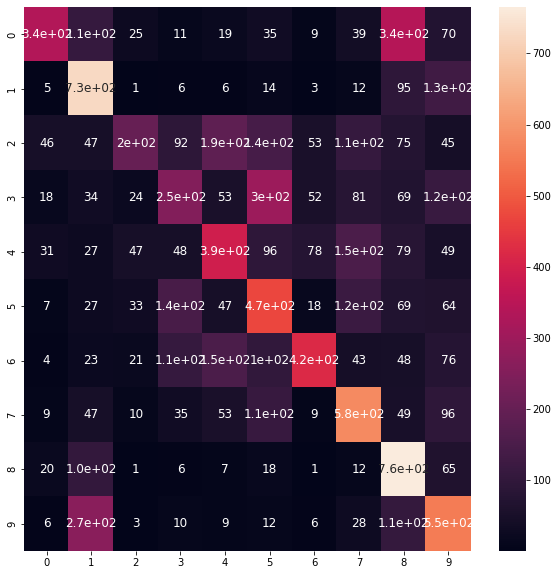

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

cm = confusion_matrix(np.argmax(ytest, axis=1), ypred)
print(type(cm), cm)
cm = pd.DataFrame(cm,  range(10),range(10))
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}, ) # font size
plt.show()

## Diferentes Formas de Visualizar el Modelo

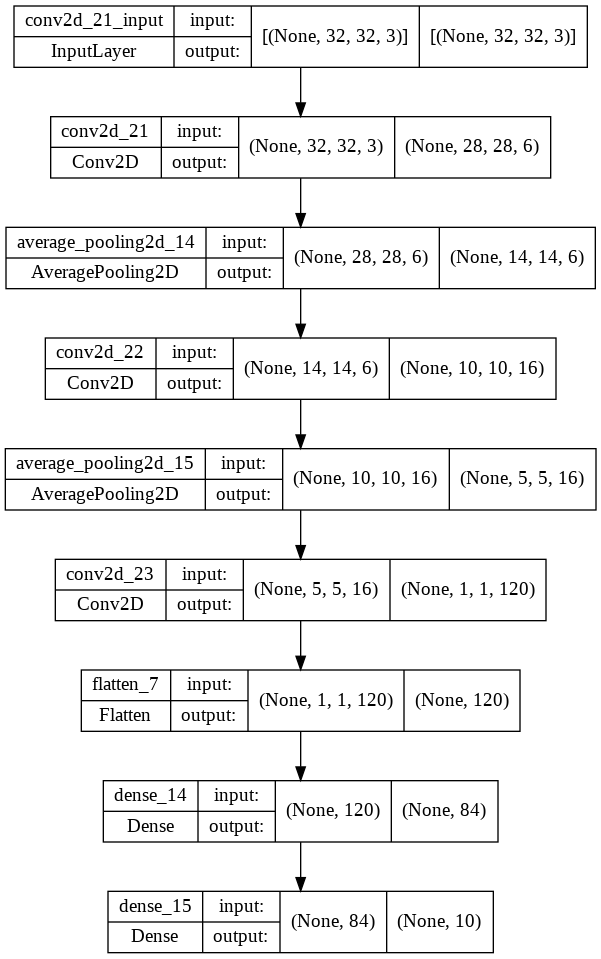

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 

visualizer(model, format='png', view=True)

IndexError: ignored

Visualkeras

In [ ]:
!pip install git+https://github.com/paulgavrikov/visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-vmhyjl0v
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-vmhyjl0v
     |████████████████████████████████| 989 kB 5.2 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=63cebe52df2fd877c331c42b81fdacd787c45c8bd3d71b969b114427d24b3510
  Stored in directory: /tmp/pip-ephem-wheel-cache-rjon5gc0/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


In [ ]:
import visualkeras

visualkeras.layered_view(model, to_file='output.png', legend=True,).show()